<center>
<h1>Fake news detection using graph neural network</h1>
<h2>Basic GNN</h2>
<i><h6>Victor GOUBET | Nicholas Tagliapietra | Asma Bakhtiariazad</h6></i>
</center>


----

# Library

In [1]:
import torch
import pickle as pk

from torch.nn import Linear, LogSoftmax
from tool_box.upfd_dataset import ext_UPFD
from tool_box.GNN_train import plot_hist, train_all_and_optimize
from torch_geometric.nn import GCNConv, global_mean_pool, global_max_pool

# Import datasets

In [2]:
datasets = pk.load(open('../data/datasets.pkl', 'rb'))

# Define the model

In [3]:
class Basic_GNN(torch.nn.Module):

    def __init__(self, num_n_feature, num_g_feature, emb_size):
        super(Basic_GNN, self).__init__()
        torch.manual_seed(42)
        self.emb_size = emb_size

        self.in_layer = GCNConv(num_n_feature, emb_size)
        self.conv = GCNConv(emb_size, emb_size)
       
       # check if we have graph features to concatenate or not
        i = 2
        if num_g_feature:
             self.lin_g = Linear(num_g_feature, emb_size)
             i = 3

        self.out_layer = Linear(i * emb_size, 2)
        self.act = LogSoftmax(dim=-1)
    
    def forward(self, x, edges_idx, batch_idx, g_features):
        
        x = self.in_layer(x, edges_idx)
        
        x = self.conv(x, edges_idx)

        flatten = torch.cat([global_mean_pool(x, batch_idx),
                             global_max_pool(x, batch_idx)], axis=1)

        if g_features.size()[-1] > 1:
            g_ft = self.lin_g(g_features)
            flatten = torch.cat([flatten, g_ft], axis=1)

        out = self.act(self.out_layer(flatten))

        return out


# Training

In [4]:
models = train_all_and_optimize(Basic_GNN, datasets, epochs = 60)

[I 2022-01-03 15:54:58,712] A new study created in memory with name: no-name-27785ad9-6a6e-4748-bfe5-0f6d470e7ff9


--> Train on: origin


[I 2022-01-03 15:55:48,138] Trial 0 finished with value: 0.8598345588235294 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.005, 'batch_size': 256, 'embedding_space_dim': 80}. Best is trial 0 with value: 0.8598345588235294.
[I 2022-01-03 15:56:42,183] Trial 1 finished with value: 0.8533241421568628 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.005, 'batch_size': 256, 'embedding_space_dim': 120}. Best is trial 0 with value: 0.8598345588235294.
[I 2022-01-03 15:57:40,644] Trial 2 finished with value: 0.8365693933823529 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.005, 'batch_size': 512, 'embedding_space_dim': 140}. Best is trial 0 with value: 0.8598345588235294.
[I 2022-01-03 15:58:39,475] Trial 3 finished with value: 0.8592830882352942 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.005, 'batch_size': 128, 'embedding_space_dim': 100}. Best is trial 0 with value: 0.8598345588235294.
[I 2022-01-03 15:59:32,881] Trial 4 finished with value: 0

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.37213701009750366  loss_val=0.3344430476427078 | acc_train=0.8527496936274509  acc_val=0.9042394301470589
Epochs: 20 | loss_train=0.3873065412044525  loss_val=0.34275418519973755 | acc_train=0.8310738357843137  acc_val=0.8561580882352942
Epochs: 30 | loss_train=0.32054484883944195  loss_val=0.2859276384115219 | acc_train=0.8810508578431372  acc_val=0.9012522977941176
Epochs: 40 | loss_train=0.3020556569099426  loss_val=0.31616953015327454 | acc_train=0.8656939338235294  acc_val=0.8649471507352942
Epochs: 50 | loss_train=0.2391084631284078  loss_val=0.24422497302293777 | acc_train=0.917279411764706  acc_val=0.9179113051470589
Epochs: 60 | loss_train=0.28823140263557434  loss_val=0.28479163348674774 | acc_train=0.8855698529411765  acc_val=0.9139476102941176


[I 2022-01-03 16:06:58,301] A new study created in memory with name: no-name-c14d363e-2386-4697-9b48-d1d2f995694c


--> Train on: dataset1


[I 2022-01-03 16:07:39,496] Trial 0 finished with value: 0.6966337316176471 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.005, 'batch_size': 512, 'embedding_space_dim': 60}. Best is trial 0 with value: 0.6966337316176471.
[I 2022-01-03 16:08:43,382] Trial 1 finished with value: 0.8377757352941175 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.005, 'batch_size': 128, 'embedding_space_dim': 120}. Best is trial 1 with value: 0.8377757352941175.
[I 2022-01-03 16:09:23,986] Trial 2 finished with value: 0.5384497549019608 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.01, 'batch_size': 256, 'embedding_space_dim': 60}. Best is trial 1 with value: 0.8377757352941175.
[I 2022-01-03 16:10:07,256] Trial 3 finished with value: 0.7274816176470589 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.01, 'batch_size': 256, 'embedding_space_dim': 60}. Best is trial 1 with value: 0.8377757352941175.
[I 2022-01-03 16:10:44,933] Trial 4 finished with value: 0.829

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.5731943051020304  loss_val=0.989870548248291 | acc_train=0.756280637254902  acc_val=0.5183823529411764
Epochs: 20 | loss_train=0.6353961063755883  loss_val=0.5384525895118714 | acc_train=0.7709865196078431  acc_val=0.7063419117647058
Epochs: 30 | loss_train=0.4565047224362691  loss_val=0.47255451083183286 | acc_train=0.7992749183006536  acc_val=0.7529411764705882
Epochs: 40 | loss_train=0.45043285025490654  loss_val=0.43830880522727966 | acc_train=0.8040747549019608  acc_val=0.8131433823529411
Epochs: 50 | loss_train=0.5259754757086436  loss_val=0.4262524485588074 | acc_train=0.7848243464052288  acc_val=0.8151654411764706
Epochs: 60 | loss_train=0.45066581500901115  loss_val=0.44854686260223386 | acc_train=0.8001429738562091  acc_val=0.8405330882352942


[I 2022-01-03 16:15:49,224] A new study created in memory with name: no-name-fa8d6f3b-8c6d-43b3-9311-7851713b9dfa


--> Train on: dataset2


[I 2022-01-03 16:16:54,419] Trial 0 finished with value: 0.7881433823529411 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.01, 'batch_size': 256, 'embedding_space_dim': 140}. Best is trial 0 with value: 0.7881433823529411.
[I 2022-01-03 16:17:58,679] Trial 1 finished with value: 0.8284007352941176 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.01, 'batch_size': 128, 'embedding_space_dim': 100}. Best is trial 1 with value: 0.8284007352941176.
[I 2022-01-03 16:18:56,175] Trial 2 finished with value: 0.7934857536764706 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.005, 'batch_size': 512, 'embedding_space_dim': 140}. Best is trial 1 with value: 0.8284007352941176.
[I 2022-01-03 16:20:03,384] Trial 3 finished with value: 0.7782628676470589 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.005, 'batch_size': 256, 'embedding_space_dim': 160}. Best is trial 1 with value: 0.8284007352941176.
[I 2022-01-03 16:21:08,272] Trial 4 finished with value: 0.7

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.577743712398741  loss_val=0.5516701698303222 | acc_train=0.7664930555555556  acc_val=0.7213235294117647
Epochs: 20 | loss_train=0.5260252687666152  loss_val=0.5341690897941589 | acc_train=0.7813521241830066  acc_val=0.7122242647058823
Epochs: 30 | loss_train=0.47287417120403713  loss_val=0.5354929447174073 | acc_train=0.8036151960784313  acc_val=0.7024816176470589
Epochs: 40 | loss_train=0.4237725105550554  loss_val=0.41859246492385865 | acc_train=0.8334865196078431  acc_val=0.8448529411764707
Epochs: 50 | loss_train=0.41540154152446324  loss_val=0.3975838363170624 | acc_train=0.8352226307189542  acc_val=0.8318933823529411
Epochs: 60 | loss_train=0.371312204334471  loss_val=0.40261595845222475 | acc_train=0.8571282679738562  acc_val=0.8424632352941176


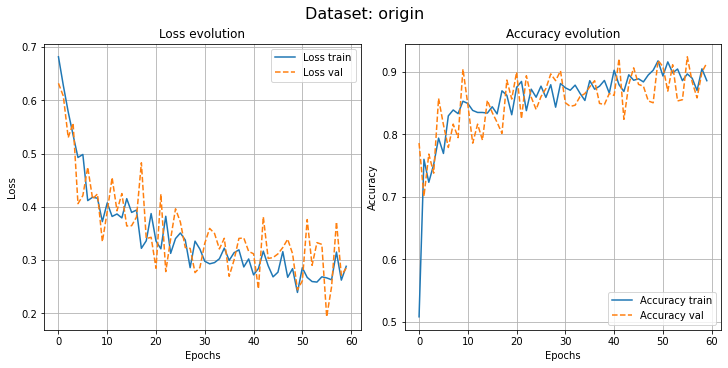

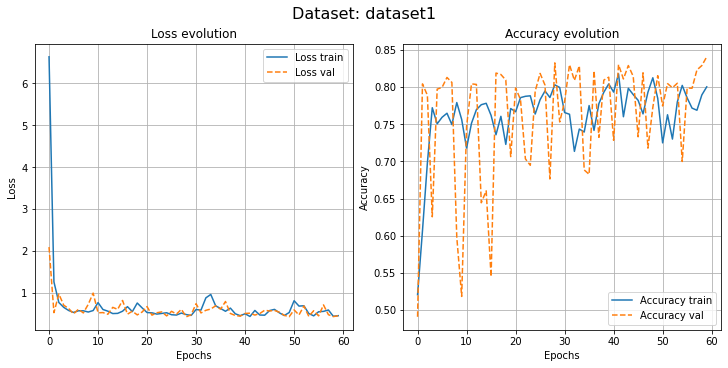

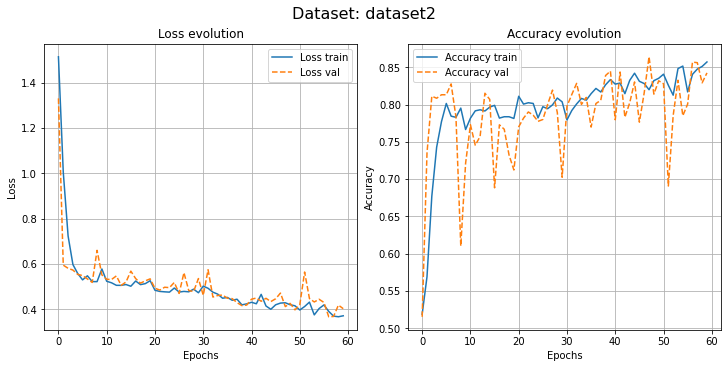

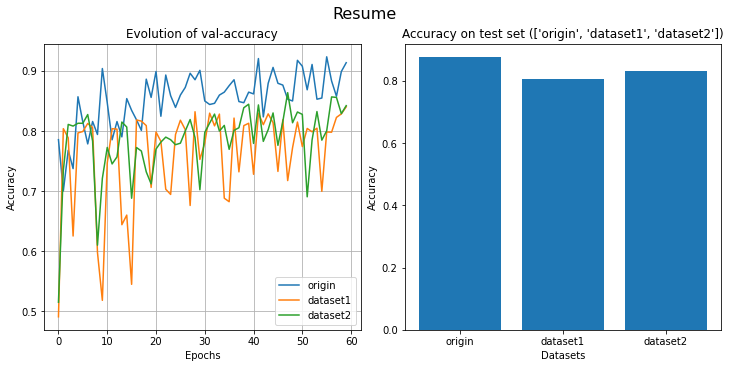

In [5]:
plot_hist(models)

# Save the three models

In [8]:
path = '../models/Basic_GNN/'
for name, model, _, _ in models:
    torch.save(model, f'{path}Basic_GNN_{name}')